# An√°lisis de la Base de Datos


### **Selecci√≥n de la base de datos**
---

Se utilizar√° la base de datos [*Students Performance Dataset - Academic Success Factors in High School Students*](https://www.kaggle.com/datasets/rabieelkharoua/students-performance-dataset), la cual contiene datos acerca de estudiantes de escuela secundaria, sus actividades extracurriculares, las horas de estudio, etc. 

El objetivo de la red a realizar es, a partir de los datos provistos, poder predecir el rendimiento acad√©mico de los alumnos (en un principio, si es *bueno* o *malo*), y determinar qu√© caracter√≠sticas influyen en dichos resultados.


In [34]:
#Se importa la librer√≠a para procesar la base de datos
import pandas as pd 

#Estas funciones modifican cu√°ntos datos se ve cuando se imprime el dataframe üëá se puede ir tocando
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.expand_frame_repr', False)
pd.reset_option('all') #Esto lo reinicia

path_file = "students.csv"
dataframe = pd.read_csv(path_file) 
##print(dataframe)

C:\Users\maxim\AppData\Local\Temp\ipykernel_4456\3575902475.py:8: FutureWarning: data_manager option is deprecated and will be removed in a future version. Only the BlockManager will be available.
  pd.reset_option('all') #Esto lo reinicia
C:\Users\maxim\AppData\Local\Temp\ipykernel_4456\3575902475.py:8: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.reset_option('all') #Esto lo reinicia


In [35]:
dataframe.describe()

StudentID          Age       Gender    Ethnicity  ParentalEducation  \
count  2392.000000  2392.000000  2392.000000  2392.000000        2392.000000   
mean   2196.500000    16.468645     0.510870     0.877508           1.746237   
std     690.655244     1.123798     0.499986     1.028476           1.000411   
min    1001.000000    15.000000     0.000000     0.000000           0.000000   
25%    1598.750000    15.000000     0.000000     0.000000           1.000000   
50%    2196.500000    16.000000     1.000000     0.000000           2.000000   
75%    2794.250000    17.000000     1.000000     2.000000           2.000000   
max    3392.000000    18.000000     1.000000     3.000000           4.000000   

       StudyTimeWeekly     Absences     Tutoring  ParentalSupport  \
count      2392.000000  2392.000000  2392.000000      2392.000000   
mean          9.771992    14.541388     0.301421         2.122074   
std           5.652774     8.467417     0.458971         1.122813   
min           0.001057     0.000000     0.000000         0.000000   
25%           5.043079     7.000000     0.000000         1.000000   
50%           9.705363    15.000000     0.000000         2.000000   
75%          14.408410    22.000000     1.000000         3.000000   
max          19.978094    29.000000     1.000000         4.000000   

       Extracurricular       Sports        Music  Volunteering          GPA  \
count      2392.000000  2392.000000  2392.000000   2392.000000  2392.000000   
mean          0.383361     0.303512     0.196906      0.157191     1.906186   
std           0.486307     0.459870     0.397744      0.364057     0.915156   
min           0.000000     0.000000     0.000000      0.000000     0.000000   
25%           0.000000     0.000000     0.000000      0.000000     1.174803   
50%           0.000000     0.000000     0.000000      0.000000     1.893393   
75%           1.000000     1.000000     0.000000      0.000000     2.622216   
max           1.000000     1.000000     1.000000      1.000000     4.000000   

        GradeClass  
count  2392.000000  
mean      2.983696  
std       1.233908  
min       0.000000  
25%       2.000000  
50%       4.000000  
75%       4.000000  
max       4.000000


### **Tipos de datos**
---
A continuaci√≥n se detallan las columnas con las que se cuenta, y los tipos de datos que representan:
- ***StudentID***: N√∫mero de identificaci√≥n del estudiante (Categ√≥rica)
- ***Age***: Edad de los estudiantes (valores entre 15 y 18 a√±os) (Discreta)
- ***Gender***: G√©nero (0 = masculino, 1 = femenino) (Categ√≥rica)
- ***Ethnicity***: Etnia (0 = Cauc√°sico, 1 = Afroamericano, 2 = Asi√°tico, 3 = Otro) (Categ√≥rica)
- ***ParentalEducation***: Educaci√≥n m√°xima alcanzada por los padres (0 = Ninguna, 1 = Secundario completo, 2 = Universidad, 3 = Bachiller, 4 = M√°s alto) (Categ√≥rica)
- ***StudyTimeWeekly***: Horas semanales de estudio (Continua)
- ***Absences***: Inasistencias durante un a√±o (Discreta)
- ***Tutoring***: Si reciben tutor√≠a especial (0 = No, 1 = S√≠) (Categ√≥rica)
- ***ParentalSupport***: Nivel de apoyo de los padres (0 = Ninguno, 1 = Bajo, 2 = Moderado, 3 = Alto, 4 = Muy alto) (Categ√≥rica)
- ***Extracurricular-Sports-Music-Volunteering***: Si realiza actividades extracurriculares, como deportes, m√∫sica o solidarias (0 = No, 1 = S√≠) (Categ√≥rica)
- ***GPA***: Calificaci√≥n, en una escala de 2 a 4 (Continua)
- ***GradeClass***: Clasificaci√≥n seg√∫n GPA { 
    
                                        0: 'A' (GPA >= 3.5)
                                        1: 'B' (3.0 <= GPA < 3.5)
                                        2: 'C' (2.5 <= GPA < 3.0)
                                        3: 'D' (2.0 <= GPA < 2.5)
                                        4: 'F' (GPA < 2.0)(Categ√≥rica)}

### **Correlaciones**
---

Para determinar cu√°les de las caracter√≠sticas estudiadas tienen m√°s relaci√≥n con la calificaci√≥n de los estudiantes, que es lo que se quiere intentar predecir, se puede calcular el √≠ndice de correlaci√≥n entre las variables, donde valores cercanos a 1 y a -1 indican mayor dependencia positiva o negativa, respectivamente.
En caso de que los valores tiendan a 0, pr√°cticamente no hay ning√∫n tipo de relaci√≥n entre las variables.


In [36]:
#Evaluaci√≥n de correlaci√≥n de variables respecto de la columna "GPA"
print(dataframe.corr()["GPA"])

StudentID           -0.002697
Age                  0.000275
Gender              -0.013360
Ethnicity            0.027760
ParentalEducation   -0.035854
StudyTimeWeekly      0.179275
Absences            -0.919314
Tutoring             0.145119
ParentalSupport      0.190774
Extracurricular      0.094078
Sports               0.057859
Music                0.073318
Volunteering         0.003258
GPA                  1.000000
GradeClass          -0.782835
Name: GPA, dtype: float64


# AC√Å PODR√çA IR EL GR√ÅFICO DE LOS CUADRADOS DE COLORES BIEN FACHA

### **An√°lisis de las variables**
---

Lo primero que podemos observar es que las variables que m√°s se relacionan con GPA son las inasistencias y la clasificaci√≥n seg√∫n GPA, ambas de forma negativa, lo cual, a simple vista, es l√≥gico. Pareciera ser que, a m√°s inasistencias, menor ser√° el rendimiento. Adem√°s, un valor de clasificaci√≥n bajo, por la forma en que se cre√≥ el dataframe, indica un GPA alto.
Otra observaci√≥n posible es que tanto el ID del estudiante, como su edad, g√©nero o etnia no influyen en las calificaciones de un alumno.

A continuaci√≥n, una clasificaci√≥n de las variables que consideraremos √∫tiles (o no) para nuestra red neuronal:

##### Variables que **s√≠** nos interesan **(Influyen en el GPA)**:
- **Inasistencias**  
   Se puede observar en la correlaci√≥n que a mayor n√∫mero de inasistencias, menor es el GPA.

Luego, en menor medida:

- **Horas semanales de estudio**
- **Tutor√≠a**
- **Soporte parental**
- **Deportes**
- **M√∫sica**

Estas √∫ltimas variables tienen una correlaci√≥n positiva moderada (aumentan a la par que el GPA), por lo que tambi√©n aportan informaci√≥n relevante sobre el GPA.
   
##### Variables que **no** nos interesan **(No influyen en el GPA)**:

- **Edad**
- **G√©nero**
- **Etnia**
- **Actividad solidaria** (actividad extracurricular)

Estas variables no presentan una relaci√≥n directa con el rendimiento acad√©mico medido por el GPA.

### **Objetivo**
---
Primero que nada, tenemos que tener en claro que nuestro objetivo es, dadas ciertas entradas (variables que s√≠ nos interesan), sobre estudiantes de secundaria que est√©n dentro del rango de nuestra muestra, poder predecir si este es un alumno **bueno** o **malo**. (es decir, GPA >= 2.5 o GPA < 2.5 respectivamente.)

Para ello, vemos que las variables que m√°s influyen en el GPA de un alumno (positivamente) son las asistencias, horas semanales, tutoria, etc. Por otro lado, se puede observar que las que no influyen tienen que ver con la edad, el g√©nero, √©tnia y actividad solidaria.

Adem√°s, si bien en el caso de la etnia se puede encontrar una muy leve correlaci√≥n, es pr√°cticamente despreciable y no es nuestro objeto de estudio.

Y para redondear, la variable o columna "gradeClass" queda descartada por ir directamente de la mano con la variable que queremos predecir, GPA.

###### Lo anterior es por ahora, si se nos hace f√°cil podr√≠amos intentar categorizar nosotros (aunque supuestamente necesitar√≠amos una muestra m√°s grandes y cambiar parte de la red, pero es posible), es decir, predecir a qu√© categoria (gradeClass) pertenece el alumno.

###### Probablemente falta explayarse m√°s en el objetivo y coso, lo dejo as√≠ por ahora.

A continuaci√≥n, una representaci√≥n gr√°fica de las correlaciones anteriormente mencionadas.

Los gr√°ficos muestran la correlaci√≥n entre las distintas variables que mencionamos y el GPA.

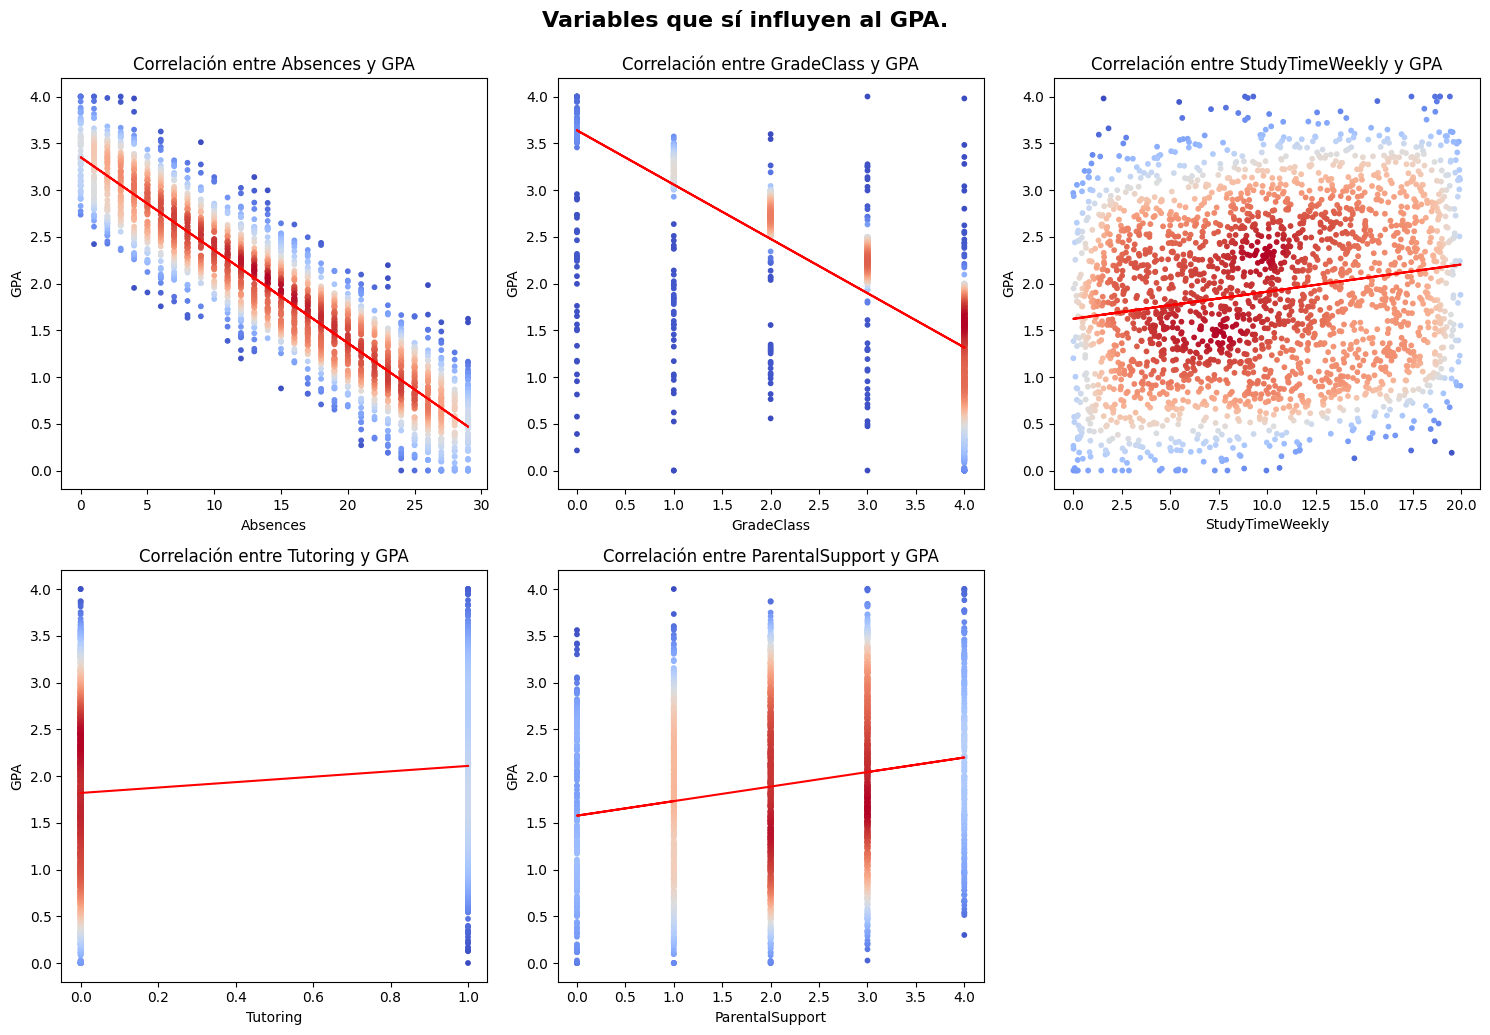

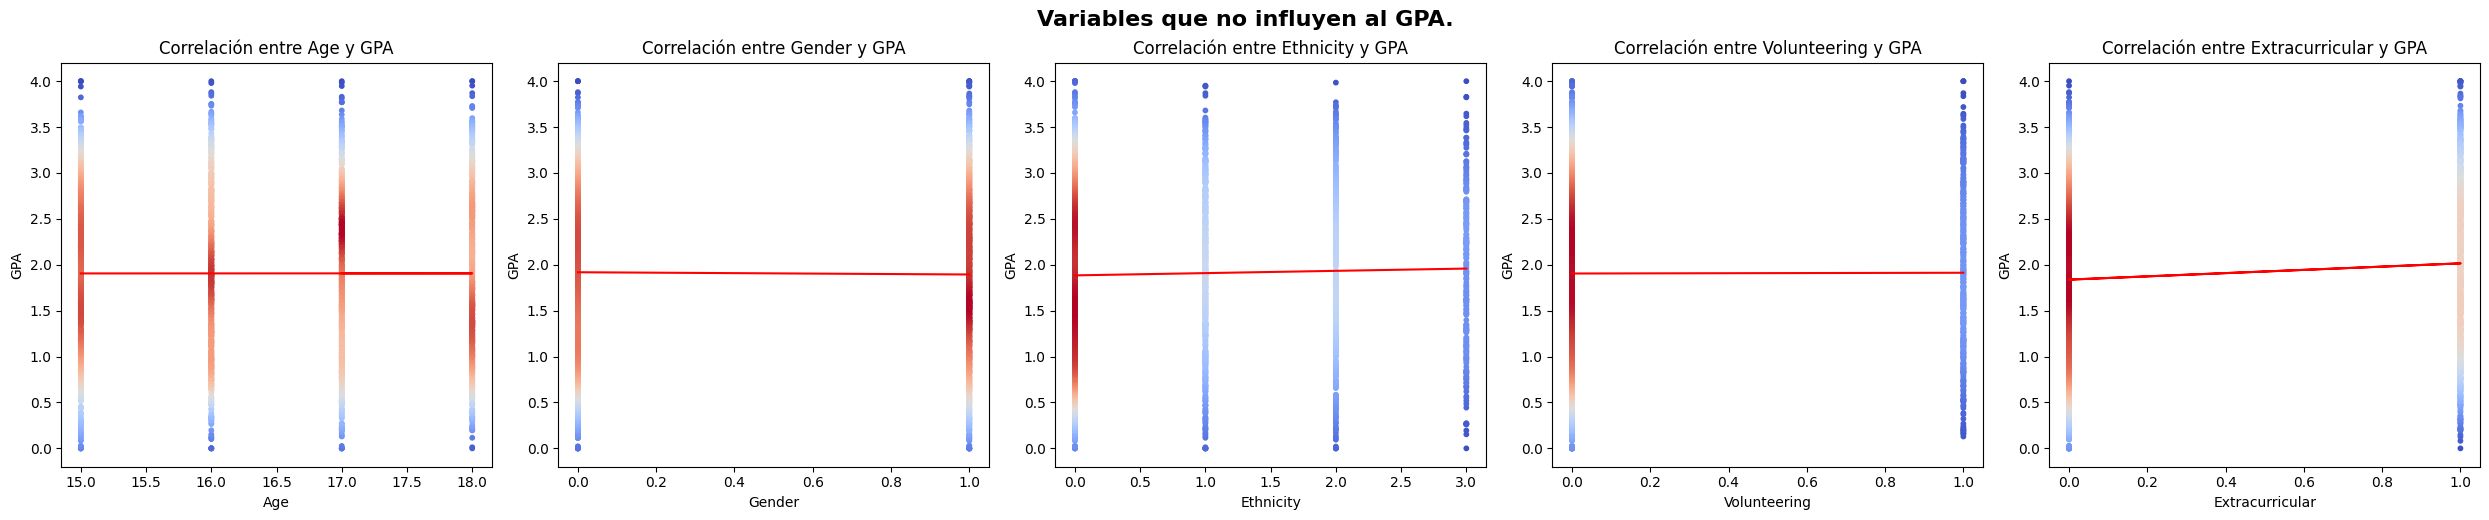

In [44]:
#Se importan las librer√≠as para crear los gr√°ficos
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

dataframe = pd.read_csv("students.csv") # Esto evita tener que ejecutar todo (Run All) para que funcione correctamente la celda de c√≥digo.

# Lista de variables que vamos a comparar contra el GPA. 
variablesConCorrelacion = ["Absences", "GradeClass", "StudyTimeWeekly", "Tutoring", "ParentalSupport"]
variablesSinCorrelacion = ["Age", "Gender", "Ethnicity", "Volunteering", "Extracurricular"]

# Funci√≥n para graficar listas de variables contra el GPA, ajustada para el n√∫mero de variables.
def graficadoraCorrelacionGPA(listaDeVariables, titulo, Large):
    num_variables = len(listaDeVariables)  # N√∫mero de variables en la lista

    if (Large):
        num_filas = (num_variables + 2) // 3  # Calcular el n√∫mero de filas necesarias (3 por fila)
        fig, axs = plt.subplots(num_filas, 3, figsize=(15, 5 * num_filas))
        axs = axs.flatten()
    else:
        fig, axs = plt.subplots(1, num_variables, figsize=(5 * num_variables, 5)) # Creamos una fila que contenga cada gr√°fico.
        axs = axs.flatten()

    for i, var in enumerate(listaDeVariables):  # Iteramos por cada elemento de la lista.
        x = dataframe[var]
        y = dataframe["GPA"]

        # Calcular la densidad de los puntos
        xy = np.vstack([x, y])
        densidad = gaussian_kde(xy)(xy)

        # Ordenamos por densidad
        idx = densidad.argsort()
        x, y, densidad = x[idx], y[idx], densidad[idx]

        # Graficamos el scatter plot usando la densidad para el color de los puntos
        sc = axs[i].scatter(x, y, c=densidad, cmap='coolwarm', s=10)  

        # Ajustamos una regresi√≥n lineal para ver mejor la correlaci√≥n
        m, b = np.polyfit(x, y, 1)
        axs[i].plot(x, (m * x + b), color="red")  # L√≠nea roja

        axs[i].set_title(f"Correlaci√≥n entre {var} y GPA")
        axs[i].set_xlabel(var)
        axs[i].set_ylabel("GPA")
    
    # Eliminar gr√°ficos vac√≠os
    for j in range(i + 1, len(axs)):  
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.suptitle(titulo, fontweight='bold', fontsize=16, y=1.03)
    plt.show()

# Ahora llamamos la funci√≥n para ambas listas
# En la funci√≥n agregu√© un par√°metro: "Large". Dependiendo si es true o false se genera un gr√°fico grande o peque√±o respectivamente.
graficadoraCorrelacionGPA(variablesConCorrelacion, "Variables que s√≠ influyen al GPA.", True)
graficadoraCorrelacionGPA(variablesSinCorrelacion, "Variables que no influyen al GPA.", False)

Con los gr√°ficos anteriores, queda en evidencia lo planteado.

Si bien podr√≠a no haber sido necesario hacerlos, con esto queda confirmado que hay variables que **no nos sirven**, como *age*, *gender*, *volunteering* o *ethnicity*. Y si bien en esta √∫ltima se aprecia una peque√±a pendiente, es despreciable, y m√°s a√∫n cuando no es nuestro objeto de estudio.

### **Transformaciones**
---

En este caso, no es necesario realizar transformaciones a los datos, ya que est√°n convertidos a valores num√©ricos aptos para el desarrollo de una red neuronal, es decir, que pueden usarse para realizar multiplicaciones matriciales, y est√°n determinados siguiendo una determinada l√≥gica (por ejemplo, un valor m√°s bajo de clase implica un mejor rendimiento, y no es un n√∫mero asignado arbitrariamente). Sin embargo, s√≠ se puede eliminar en primera instancia las variables que no influyen en el rendimiento acad√©mico de los estudiantes, las cuales se detallaron m√°s arriba.

In [38]:
#Se elimina las columnas de ID, Edad, G√©nero y Etnia
dataframe.drop(columns = ["StudentID", "Age", "Gender", "Ethnicity"], inplace = True)
print(dataframe)

      ParentalEducation  StudyTimeWeekly  Absences  Tutoring  ParentalSupport  \
0                     2        19.833723         7         1                2   
1                     1        15.408756         0         0                1   
2                     3         4.210570        26         0                2   
3                     3        10.028829        14         0                3   
4                     2         4.672495        17         1                3   
...                 ...              ...       ...       ...              ...   
2387                  3        10.680555         2         0                4   
2388                  1         7.583217         4         1                4   
2389                  2         6.805500        20         0                2   
2390                  0        12.416653        17         0                2   
2391                  2        17.819907        13         0                2   

      Extracurricular  Spor

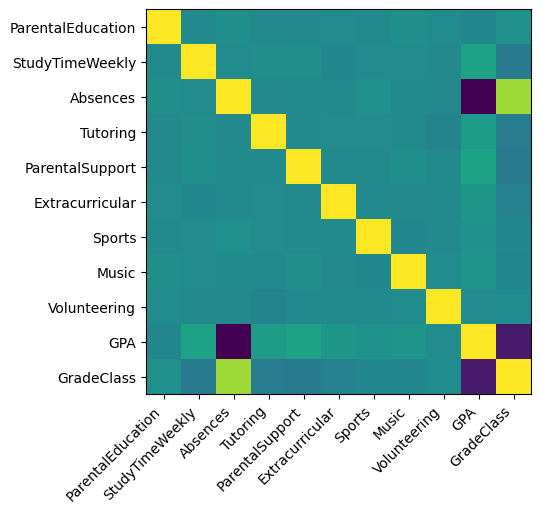

In [39]:
#Esto lo copi√© de lo que pas√≥ el profe ¬Ø\_(„ÉÑ)_/¬Ø ajustar

import matplotlib.pyplot as plt
labels = dataframe.columns.to_list()
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow((dataframe.corr().to_numpy()))
ax.set_xticks(np.arange(0, len(labels)))
ax.set_xticklabels(dataframe.columns.to_list(), rotation=45, ha='right')
ax.set_yticks(np.arange(0, len(labels)))
ax.set_yticklabels(dataframe.columns.to_list(), ha='right');